### t-sne visualizations of different classification datasets
* Concentric n-dimen spheres

In [2]:
import numpy as np

In [34]:
# Generating n-dimen concentric spheres data
def generateNDSpheres(N=3, C=3, M_C=5000):
    # N is number of dimensions
    # C is number of classes
    # M_C is number of examples per class
    M = C*M_C
    X = np.zeros((M,N))
    y = np.zeros((M,1))
    for c in range(C):
        R = 100*(c+1)
        aggSum = np.zeros(M_C)
        for n in range(N):
            X2 = None
            if n == N-1:
                X2 = (R*R - aggSum)
            else:
                X2 = np.multiply((R*R-aggSum), np.random.rand(M_C))
            aggSum+=X2
            X[c*M_C:(c+1)*M_C,n] = np.multiply(2*np.random.randint(2, size=M_C)-1, np.sqrt(X2))
        y[c*M_C:(c+1)*M_C] = c
    return X,y

SX, Sy = generateNDSpheres(N=3, C=3, M_C=3000)

In [35]:
print(SX[:2])
print(Sy[:2])

[[ 81.61931311  31.65889015  48.33220875]
 [ 59.66029451  66.24251875  45.30538564]]
[[ 0.]
 [ 0.]]


<IPython.core.display.Javascript object>


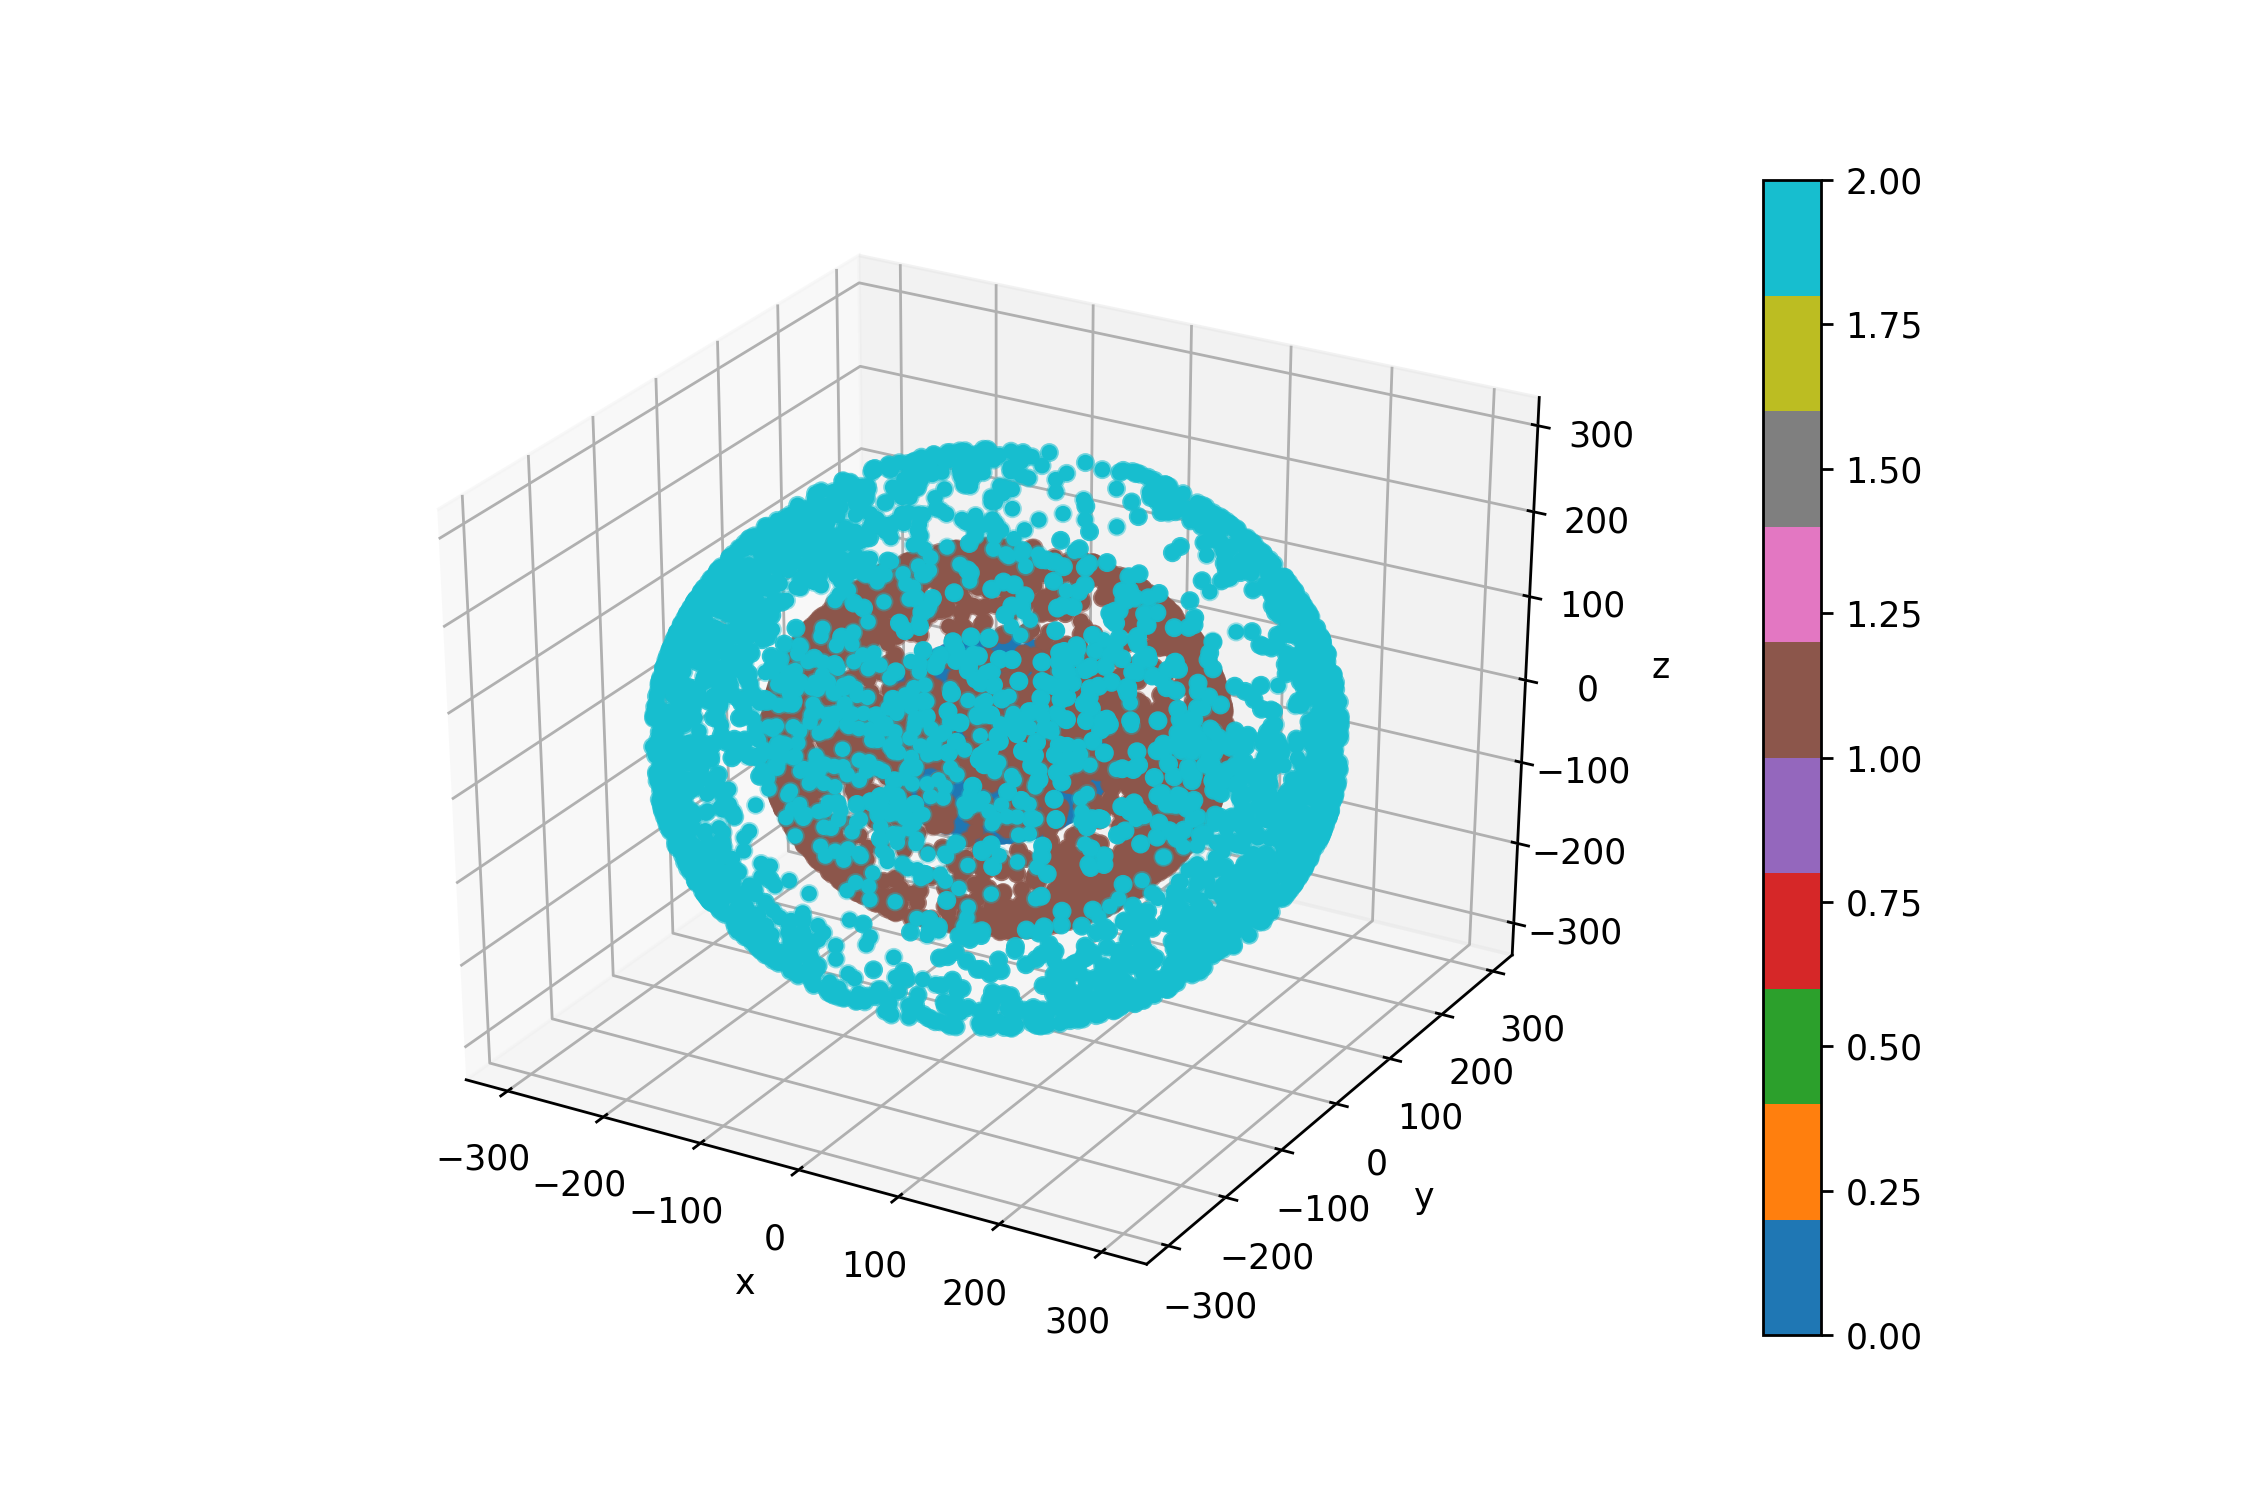

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib notebook
plt.ion()

fig = plt.figure(figsize=(9,6))
chart3d = fig.add_subplot(111, projection='3d')
c3d = chart3d.scatter(SX[:,0], SX[:,1], SX[:,2], c=Sy[:,0], cmap=cm.tab10)
chart3d.set_xlabel('x')
chart3d.set_ylabel('y')
chart3d.set_zlabel('z')
fig.colorbar(c3d)
plt.show()

In [37]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(SX)

print('t-SNE done! Time elapsed: ', format(time.time()-time_start), ' seconds')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.002s...
[t-SNE] Computed neighbors for 9000 samples in 0.401s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 12.953270
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.099792
[t-SNE] Error after 600 iterations: 0.746351
t-SNE done! Time elapsed:  117.44140625  seconds


<IPython.core.display.Javascript object>


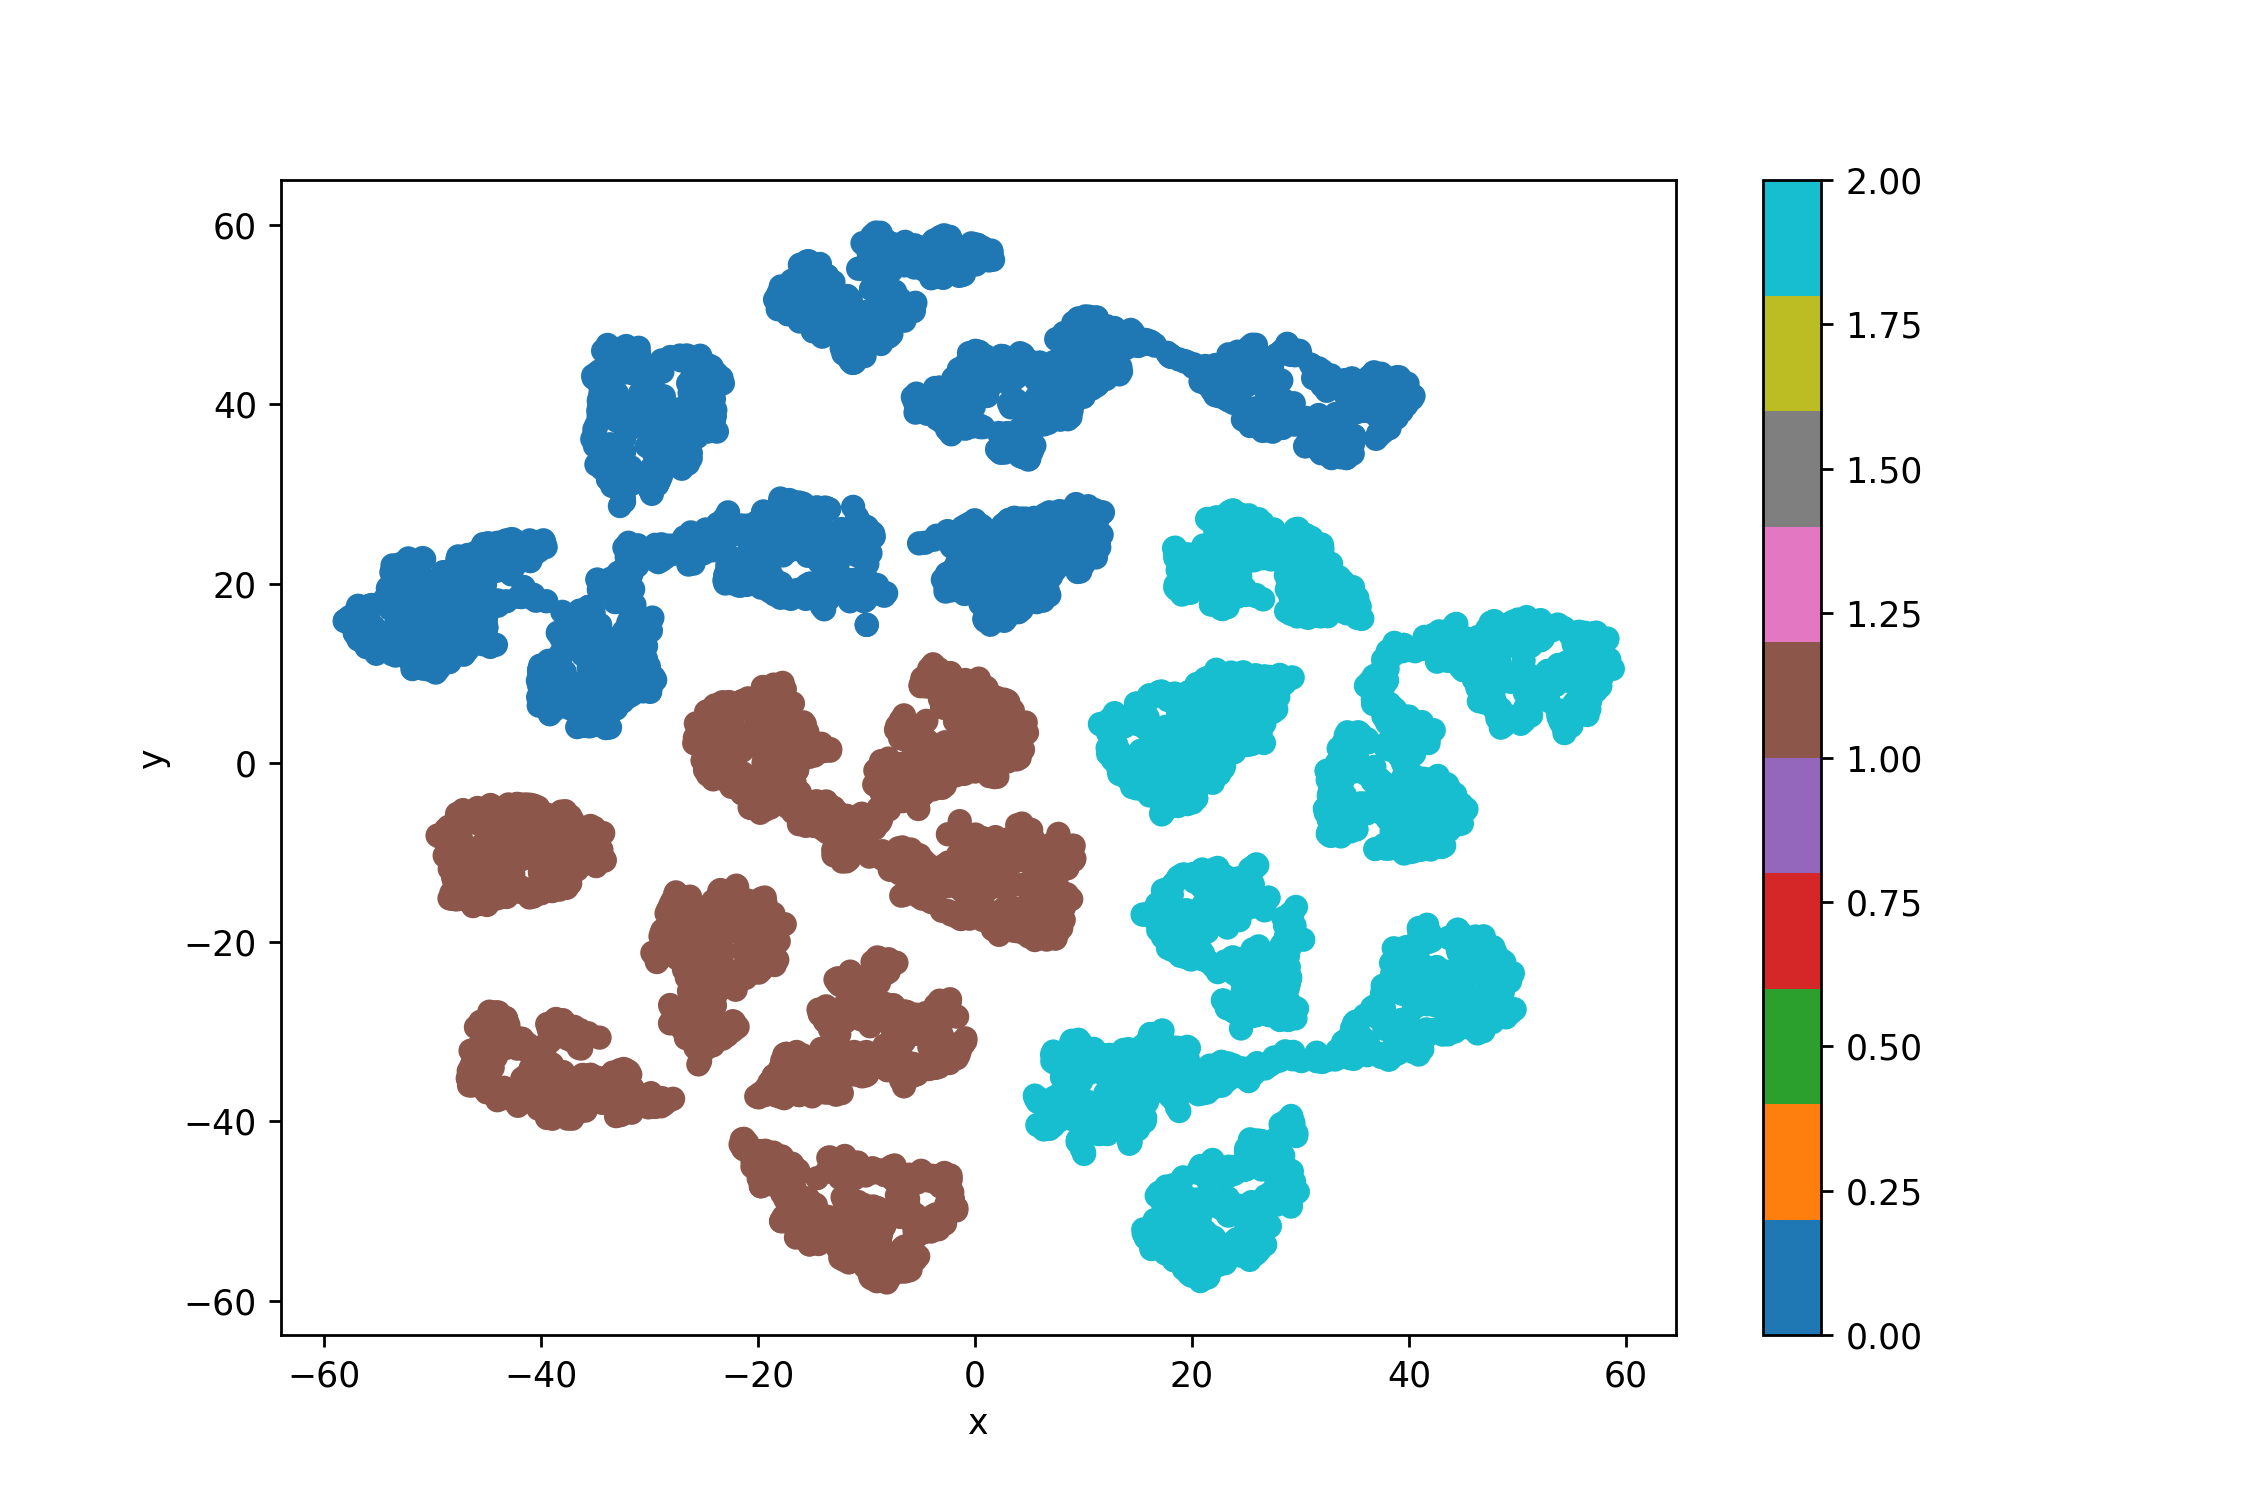

In [38]:
import matplotlib.cm as cm
%matplotlib notebook
plt.ion()

fig = plt.figure(figsize=(9,6))
chart2d = fig.add_subplot(111)
c2d = chart2d.scatter(tsne_results[:,0], tsne_results[:,1], c=Sy[:,0], cmap=cm.tab10)
chart2d.set_xlabel('x')
chart2d.set_ylabel('y')
fig.colorbar(c2d)
plt.show()